1. Jacking the right mods, slotting the needed scripts.

In [1]:
 # Libraries
 import os
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import ipaddress
 from sklearn.preprocessing import LabelEncoder, StandardScaler
 from sklearn.model_selection import train_test_split
 from tensorflow.keras.utils import to_categorical
 from imblearn.over_sampling import SMOTE

2. Slotting Data into memory

In [2]:
 #Load the chosen dataset
 df = pd.read_csv("cybersecurity_attacks.csv", parse_dates=['Timestamp'])

3. Scoping the data streets, sniffing out the patterns.

Dimension (No.of Rows, No.of Columns) of the Dataset:  (32880, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               32880 non-null  datetime64[ns]
 1   Source IP Address       32880 non-null  object        
 2   Destination IP Address  32880 non-null  object        
 3   Source Port             32880 non-null  int64         
 4   Destination Port        32880 non-null  int64         
 5   Protocol                32880 non-null  object        
 6   Packet Length           32880 non-null  int64         
 7   Packet Type             32880 non-null  object        
 8   Traffic Type            32880 non-null  object        
 9   Payload Data            32880 non-null  object        
 10  Malware Indicators      16388 non-null  object        
 11  Anomaly Scores          32880 non-null 

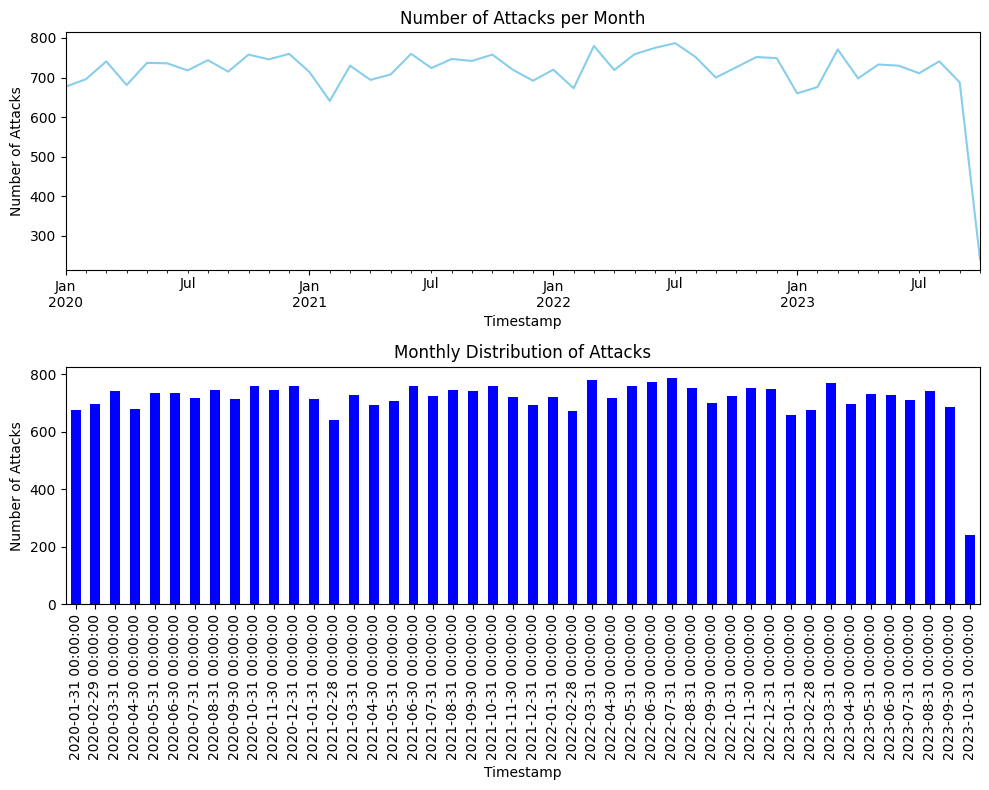

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         2902       2951     2856
2021         2916       2847     2867
2022         2940       2926     3026
2023         2285       2185     2179


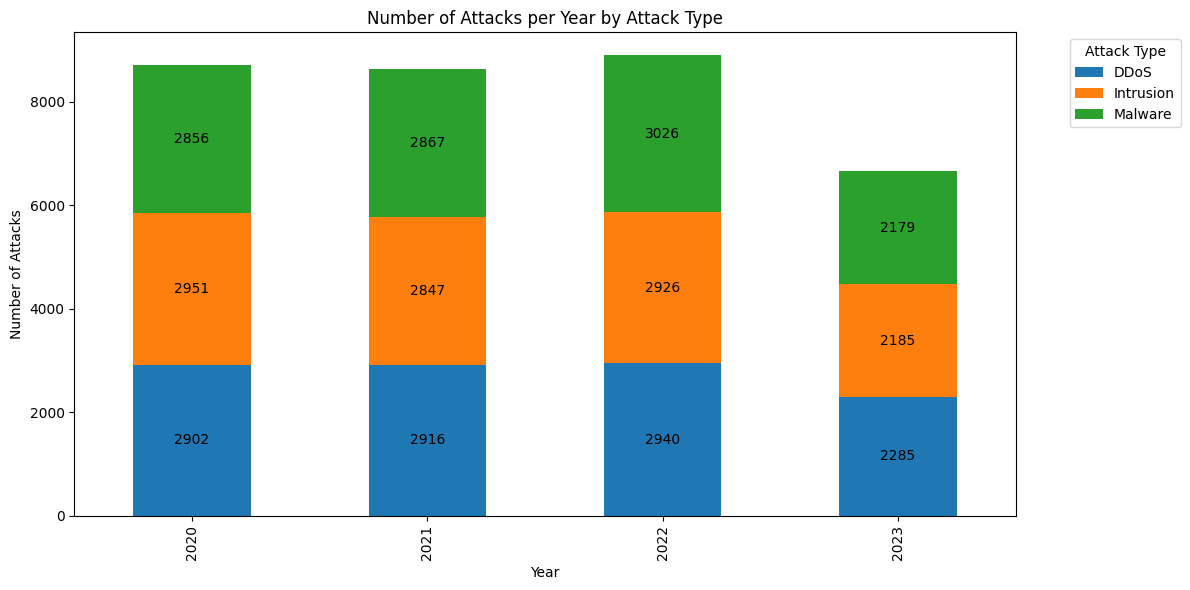

  Protocol Attack Type  COUNT
0     ICMP        DDoS   3712
6      UDP        DDoS   3698
5      TCP     Malware   3680
2     ICMP     Malware   3655
1     ICMP   Intrusion   3654
7      UDP   Intrusion   3647
3      TCP        DDoS   3633
4      TCP   Intrusion   3608
8      UDP     Malware   3593


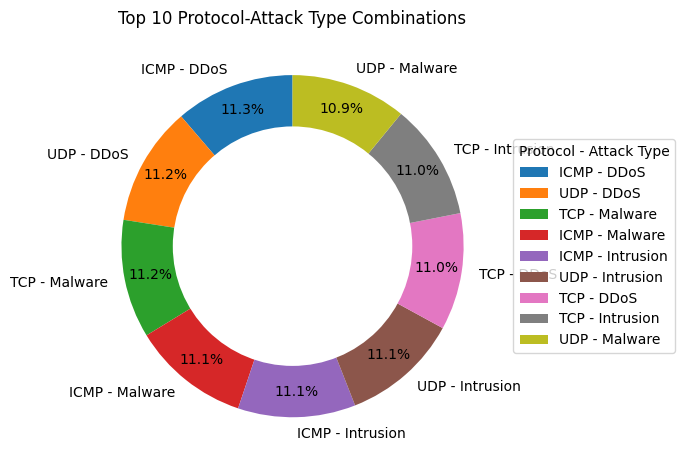

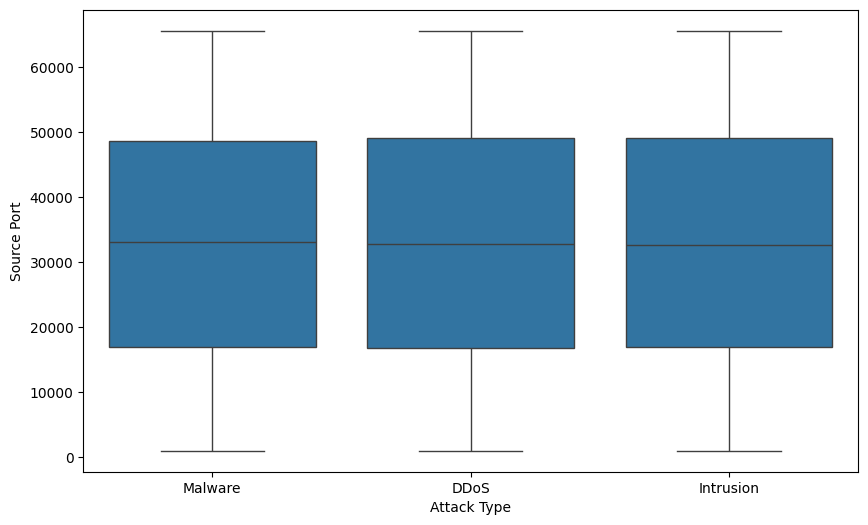

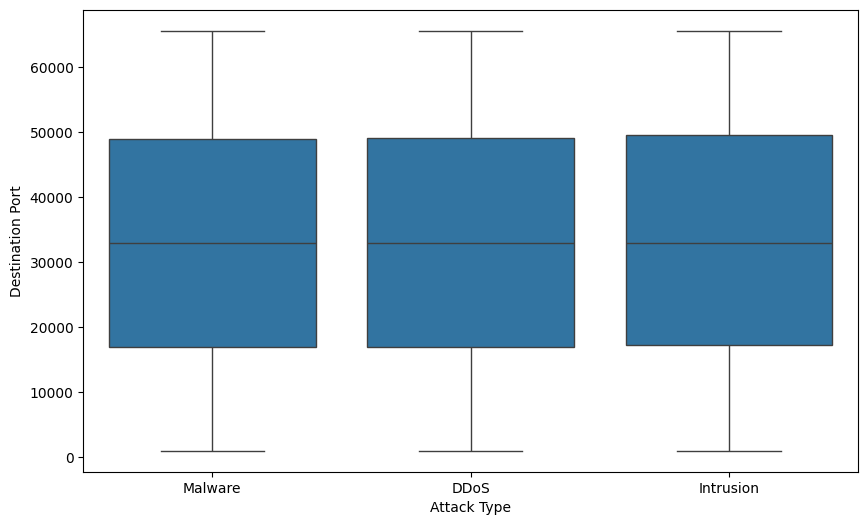

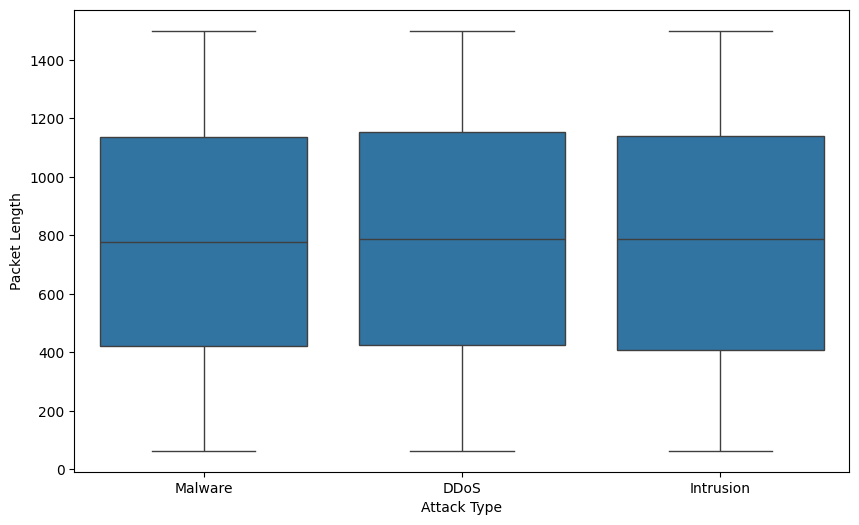

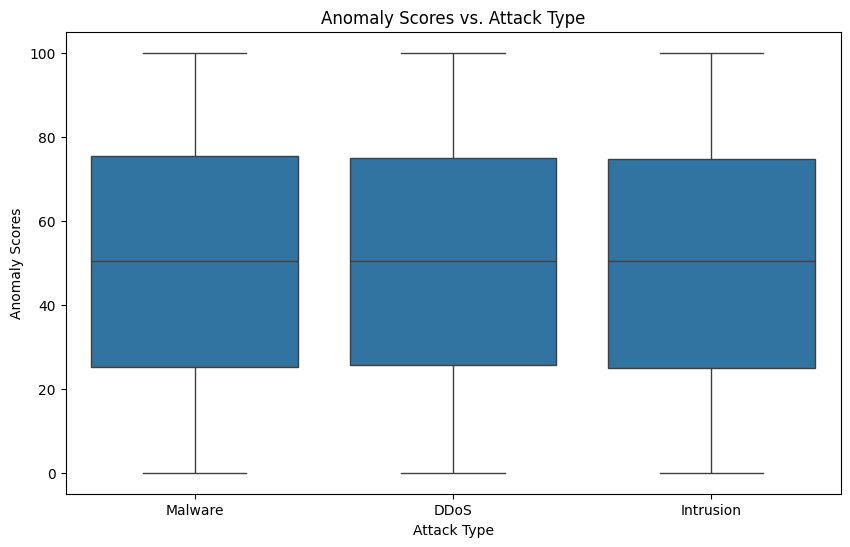

In [6]:
#Display the first 05 records in chosen dataset
df.head().T
#Dimension of the Dataset
print("Dimension (No.of Rows, No.of Columns) of the Dataset: ", df.shape)
#Dataset Information: Dimension, Column Names & its count, data types
df.info()
#Dataset Description: Statistical summary for numerical columns of the dataset
df.describe().T
#Frequency of Attacks
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
monthly_attacks = df.resample('ME', on='Timestamp')['Attack Type'].count()
print("Information on Frequncy of Attacks")
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
monthly_attacks.plot(ax=ax[0], color='skyblue')
ax[0].set_title('Number of Attacks per Month')
ax[0].set_ylabel('Number of Attacks')
monthly_attacks.plot(kind='bar', ax=ax[1], color='blue')
ax[1].set_title('Monthly Distribution of Attacks')
ax[1].set_ylabel('Number of Attacks')
plt.tight_layout()
plt.show()
#Number of Attacks per year
df['Year']=df['Timestamp'].dt.year
# Group by YEAR and ATTACK TYPE, count occurrences
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
# Print a summary of the data
print("Summary of the No.of Attacks Year wise\n",attack_counts)
# Plot the data
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
# Customize the plot
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Add value labels on the bars
for c in ax.containers:
  ax.bar_label(c, label_type='center')
# Show the plot
plt.show()
# Count occurrences of each combination of PROTOCOL and ATTACK TYPE
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')
# Sort by count in descending order and take top 10 for better visibility
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)
# Print a summary of the data
print(top_10)
# Create a pie chart
#ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1),
autopct='%1.1f%%', startangle=90, pctdistance=0.85)
# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# Add title
plt.title('Top 10 Protocol-Attack Type Combinations')
# Add legend
plt.legend(title='Protocol - Attack Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
# Adjust layout to prevent cutting off labels
plt.tight_layout()
# Show the plot
plt.show()
# Explore relationships between features and the target variable
# Select some features for visualization. Adjust based on actual features in your dataset.
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
for feature in features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Attack Type', y=feature, data=df)

plt.title(f'{feature} vs. Attack Type')
plt.xlabel('Attack Type')
plt.ylabel(feature)
plt.show()

3. Prepping the data stack, tuning it for the grind

In [11]:
#Handling Missing values: Identify the columns with missing values and fill with 0
# Get column names with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()
# Print the result
print("Columns with missing values:")
for column in columns_with_missing:
  print(column)
# If you want to also see the count of missing values:
print("\nColumns with missing values and their counts:")
for column in columns_with_missing:
  missing_count = df[column].isnull().sum()
print(f"{column}: {missing_count}")
# Fill the missing values with 0
df = df.fillna(0)
df.info()
#Convert some of the dataset values into integer
#convert the Timestamp into UNIX Epochs time which is in a long interger format
print("Timestamp values in YYYY-MM-DD HH:MM:SS format, \n",df['Timestamp'])

Columns with missing values:

Columns with missing values and their counts:
Log Source: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               32880 non-null  int64  
 1   Source IP Address       32880 non-null  int64  
 2   Destination IP Address  32880 non-null  int64  
 3   Source Port             32880 non-null  int64  
 4   Destination Port        32880 non-null  int64  
 5   Protocol                32880 non-null  object 
 6   Packet Length           32880 non-null  int64  
 7   Packet Type             32880 non-null  object 
 8   Traffic Type            32880 non-null  object 
 9   Payload Data            32880 non-null  object 
 10  Malware Indicators      32880 non-null  int64  
 11  Anomaly Scores          32880 non-null  float64
 12  Alerts/Warnings         32880 non-null  int64  
 13  A

In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # unit='s' specifies seconds since the Epoch
df['Timestamp'] = df['Timestamp'].apply(lambda x: int(x.timestamp()))
print("Timestamp in UNIX Epoch format:\n", df['Timestamp'])
#Convert the IP Addresses (Source IP Address & Destination IP Address) in the chosen Dataset into Integers
print("Before conversion the IP Addresses in the Dataset: \n",df.head())
def ip_to_int(ip):
  return int(ipaddress.ip_address(ip))
df['Destination IP Address'] = df['Destination IP Address'].apply(ip_to_int)
df['Source IP Address'] = df['Source IP Address'].apply(ip_to_int)
print("After conversion the IP Addresses in the Dataset: \n",df.head())
df.head(2).T
#Replace certain values with 1 for the columns where Firewall Logs value is 'Log Data', Malware Indicators value is 'IoC Detected' & Ale
df['Firewall Logs'] = df['Firewall Logs'].replace('Log Data', 1)
df['Malware Indicators'] = df['Malware Indicators'].replace('IoC Detected', 1)
df['Alerts/Warnings'] = df['Alerts/Warnings'].replace('Alert Triggered', 1)
print("After replacing certain values of columns: Firewall Log, Malware Indicators & Alerts/Warning with 1,\n")
df.head(2).T
#Drop columns: IDS/IPS Alerts and Proxy Information as these two feature has no valid contribution in our model
print("Dimension of Chosen Dataset: ", df.shape)
# Check if columns exist before dropping
columns_to_drop = ['IDS/IPS Alerts', 'Proxy Information']  # Removed 'Year' as it might already be dropped
for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")

#Drop column: Year if it exist in our model
if 'Year' in df.columns:
    df = df.drop(columns=['Year'])
else:
    print(f"Column 'Year' not found in DataFrame. Skipping.")
print("Processed Dataset Dimension is, ", df.shape)
# Hot Encoding or Label Encoding, Converting the categorical values into numerical values
# ... (rest of your code)
print("Processed Dataset Dimension is, ", df.shape)
# Hot Encoding or Label Encoding, Converting the categorical values into numerical values
le = LabelEncoder()
df['Attack Type'] = le.fit_transform(df['Attack Type'])
df['Log Source'] = df['Log Source'].astype(str)
df['Attack Signature'] = le.fit_transform(df['Attack Signature'])
df['Action Taken'] = le.fit_transform(df['Action Taken'])
df['Severity Level'] = le.fit_transform(df['Severity Level'])
df['User Information'] = le.fit_transform(df['User Information'])
# Convert 'Device Information' column to string type before applying Label Encoding
df['Device Information'] = df['Device Information'].astype(str)
df['Device Information'] = le.fit_transform(df['Device Information'])
# Convert 'Network Segment' column to string type before applying Label Encoding
df['Network Segment'] = df['Network Segment'].astype(str)
df['Network Segment'] = le.fit_transform(df['Network Segment'])
df['Protocol'] = le.fit_transform(df['Protocol'])
df['Geo-location Data'] = df['Geo-location Data'].astype(str)
df['Geo-location Data'] = le.fit_transform(df['Geo-location Data'])
df['Packet Type'] = le.fit_transform(df['Packet Type'])
df['Traffic Type'] = le.fit_transform(df['Traffic Type'])
df['Payload Data'] = le.fit_transform(df['Payload Data'])
df.info()
#Claculate the number of attacks using class variable: Attack Type
if 'Attack Type' in df.columns:
  attack_counts = df['Attack Type'].value_counts()
  if not attack_counts.empty:
      le = LabelEncoder()
      le.fit(df['Attack Type'])
      class_names = le.inverse_transform(attack_counts.index)
      print("Attacks detected:")
attack_counts = df['Attack Type'].value_counts()
num_unique_attack_types = attack_counts.nunique()
print(f"Number of unique Attack Types: {num_unique_attack_types}")
class_names = {
  0: "DDoS",
  1: "Intrusion",
  2: "Malware"
}

Timestamp in UNIX Epoch format:
 0        1685428438
1        1598425710
2        1668327805
3        1688294326
4        1689513067
            ...    
32875    1618822627
32876    1653314375
32877    1597469144
32878    1612440681
32879    1671397401
Name: Timestamp, Length: 32880, dtype: int64
Before conversion the IP Addresses in the Dataset: 
     Timestamp  Source IP Address  Destination IP Address  Source Port  \
0  1685428438         1742212876              1409918204        31225   
1  1598425710         1321720262              1119848858        17245   
2  1668327805         1062195760              3336262161        16811   
3  1688294326         2737488906              1709490431        20018   
4  1689513067         1202108748              3186863854         6131   

   Destination Port  Protocol  Packet Length Packet Type Traffic Type  \
0             17616         0            503        Data         HTTP   
1             48166         0           1174        Data        

In [21]:
print("Unique Attack Types and their Counts:")
for attack_type, count in attack_counts.items():
  class_name = class_names.get(attack_type, "Unknown Class")
  print(f"{class_name} ({attack_type}): {count}")

Unique Attack Types and their Counts:
DDoS (0): 11043
Malware (2): 10928
Intrusion (1): 10909


4. Leveling the data field with SMOTE, juicing it up with augmentation.

Dimension of the Dataset:  (32880, 23)
Dimension of Feature Variables (X):  (32880, 22) Dimension of Target Variable (y):  (32880,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399996 entries, 0 to 399995
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               399996 non-null  float64
 1   Source IP Address       399996 non-null  float64
 2   Destination IP Address  399996 non-null  float64
 3   Source Port             399996 non-null  float64
 4   Destination Port        399996 non-null  float64
 5   Protocol                399996 non-null  float64
 6   Packet Length           399996 non-null  float64
 7   Packet Type             399996 non-null  float64
 8   Traffic Type            399996 non-null  float64
 9   Payload Data            399996 non-null  float64
 10  Malware Indicators      399996 non-null  float64
 11  Anomaly Scores          399996 non-null  float64
 

Text(0.5, 1.0, 'Ditribution of Attacks (After Data Balancing)')

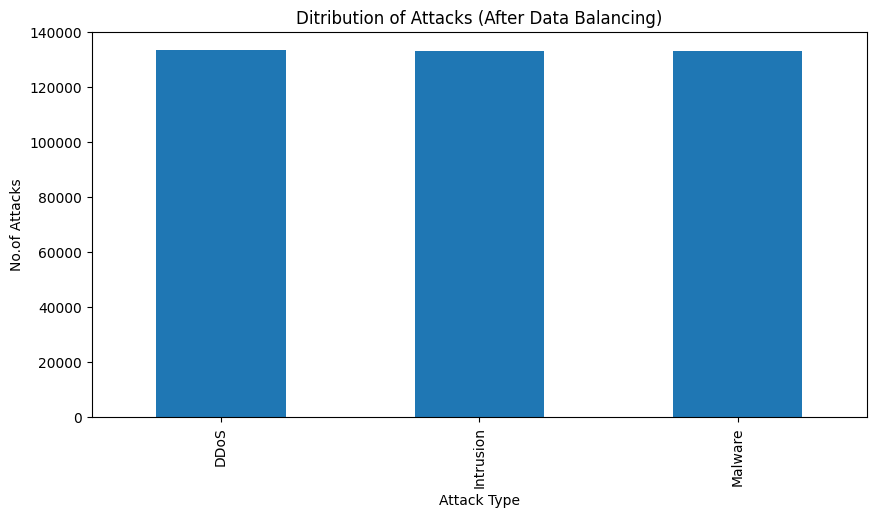

In [24]:
#Separate the Feature Variables (X) and Target/ Class Variables (y) in the Chosen Dataset
print("Dimension of the Dataset: ", df.shape)
X = df.drop(columns=['Attack Type'])
y = df['Attack Type']
print("Dimension of Feature Variables (X): ",X.shape,"Dimension of Target Variable (y): ", y.shape)

#Data balancing using SMOTE and Data Augmentation
target_size = 200000
class_counts = y.value_counts().to_dict()
total_samples_needed = target_size - len(y)
samples_per_class = {cls: count + total_samples_needed // len(class_counts) for cls, count in class_counts.items()}
smote = SMOTE(sampling_strategy=samples_per_class, random_state=42)

# Ensure all columns in X are numeric
# Convert all object (string) columns to numeric using Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column].astype(str))

X_res, y_res = smote.fit_resample(X, y)

def add_noise(dataframe, noise_level=0.01):
  noise = np.random.randn(*dataframe.shape) * noise_level
  dataframe_noisy = dataframe + noise
  return dataframe_noisy

numerical_columns = X_res.select_dtypes(include=[np.number]).columns
X_res_noisy = add_noise(X_res[numerical_columns])
X_augmented = pd.concat([X_res, X_res_noisy], ignore_index=True)
y_augmented = pd.concat([y_res, y_res], ignore_index=True)

df_resampled = X_augmented.copy()
df_resampled['Attack Type'] = y_augmented
df_resampled.info()
#df_resampled.shape
#Number of Attack classes after Data Balancing
print("Number of Attack Classes: ",df_resampled['Attack Type'].unique())
print("\nNumber of Samples for each Attack Classes: ",df_resampled['Attack Type'].value_counts())
# Plotting the data samples after DATA BALANCING using SMOTE
plt.figure(figsize=(10,5))
df_resampled['Attack Type'].value_counts().plot(kind='bar')
plt.xticks([0,1,2], ['DDoS', 'Intrusion', 'Malware'])
plt.ylabel('No.of Attacks')
plt.title("Ditribution of Attacks (After Data Balancing)")

5. Cracking the data vault—stash some for training, slice the rest for testing.

In [29]:
# Train-test split
# Changed test_size to 0.2, which allocates 20% of the data to the test set.
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(columns=['Attack Type']), df_resampled['Attack Type'], test_size=0.2, random_state=42)  # Added random_state for reproducibility
print("After Splitting the Dataset,\nDimensions of TRAINING SET: ", X_train.shape,y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape,y_test.shape)
X_train.head(2)
y_train.head(2)
X_test.head(2)
y_test.head(2)

After Splitting the Dataset,
Dimensions of TRAINING SET:  (319996, 22) (319996,)
Dimensions of TESTING SET:  (80000, 22) (80000,)


,Attack Type
242136,0
365751,2


6. Cleaning up the raw feed—standardizing or normalizing the streams for smooth ops.

In [30]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert labels to categorical format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("After Feature Scaling,\nDimensions of TRAINING SET: ", X_train.shape,y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape,y_test.shape)
# Problem: Based on the above code divide your data into three different sets - Training, Validation, and Test.
# Your code to divide the data into three parts
#

After Feature Scaling,
Dimensions of TRAINING SET:  (319996, 22) (319996, 3)
Dimensions of TESTING SET:  (80000, 22) (80000, 3)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,  # 20% of the remaining 80% for validation
    random_state=42
)

# Display the shapes of the three splits
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Validation set shape (X, y):", X_val.shape, y_val.shape)
print("Test set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (163836, 22) (163836, 3)
Validation set shape (X, y): (40960, 22) (40960, 3)
Test set shape (X, y): (80000, 22) (80000, 3)
